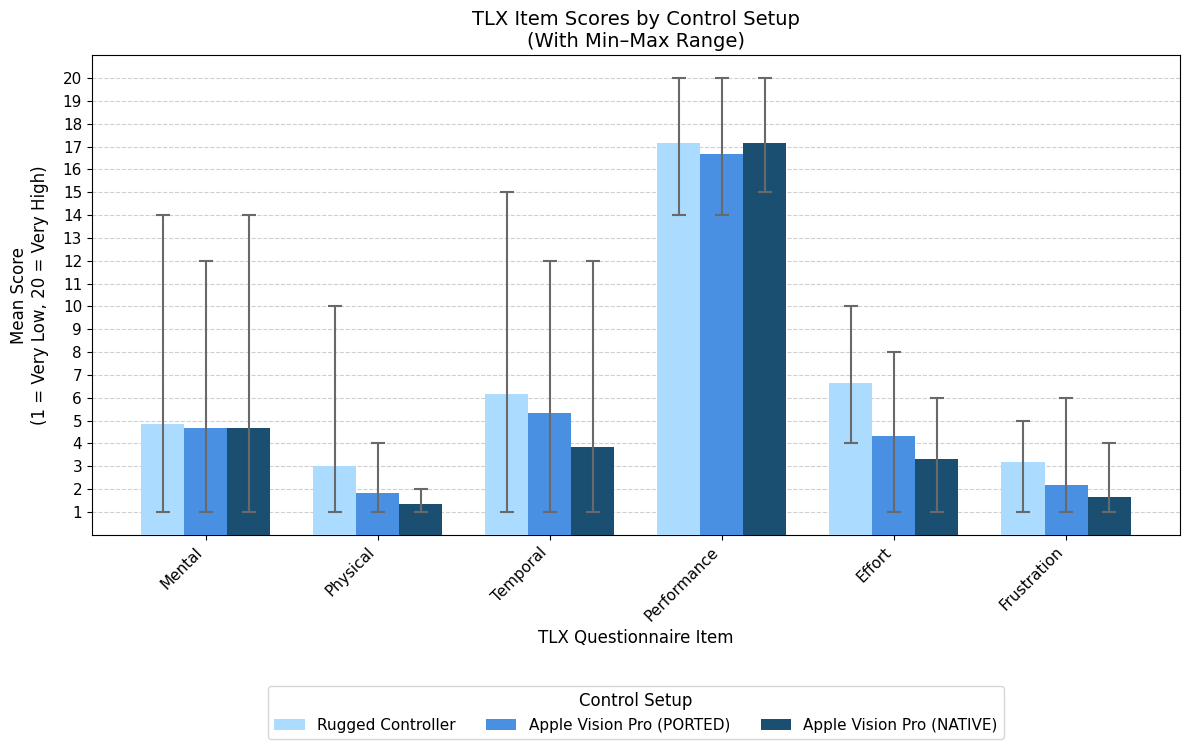

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load SUS item data
df = pd.read_csv('tlx.csv', sep=';', encoding='latin1', decimal=',')

# Identify TLX item columns
exclude = [
    '$submission_id', '$created', 'First name', 'Control Setup',
    '$answer_time_ms', 'User', 'SCORE', 'TLX SCORE'
]
item_cols = [c for c in df.columns if c not in exclude]

# Convert to numeric
for col in item_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Compute stats
grouped   = df.groupby('Control Setup')[item_cols]
setups    = ['Rugged Controller', 'Apple Vision Pro (PORTED)', 'Apple Vision Pro (NATIVE)']
mean_vals = grouped.mean().loc[setups]
min_vals  = grouped.min().loc[setups]
max_vals  = grouped.max().loc[setups]

# --- Define your exact colors here ---
colors = {
    'Rugged Controller':        '#ABDBFF',
    'Apple Vision Pro (PORTED)': '#4A90E2',
    'Apple Vision Pro (NATIVE)': '#1B4F72'
}

fig, ax = plt.subplots(figsize=(12, 8))

ax.set_axisbelow(True)

x = np.arange(len(item_cols))
width = 0.25

for i, setup in enumerate(setups):
    pos    = x + (i-1)*width
    means  = mean_vals.loc[setup]
    lowers = means - min_vals.loc[setup]
    uppers = max_vals.loc[setup] - means

    ax.bar(
        pos,
        means,
        width,
        color=colors[setup],
        label=setup,
        zorder=3                # bars on top
    )
    ax.errorbar(
        pos,
        means,
        yerr=[lowers, uppers],
        fmt='none',
        ecolor='dimgray',
        capsize=5,
        elinewidth=1.5,
        capthick=1.5,
        zorder=3                # error bars on top
    )

plt.xlabel('TLX Questionnaire Item', fontsize=12)
plt.ylabel('Mean Score\n(1 = Very Low, 20 = Very High)', fontsize=12, labelpad=10)
plt.title('TLX Item Scores by Control Setup\n(With Min–Max Range)', fontsize=14)
plt.xticks(
    x,
    ['Mental', 'Physical', 'Temporal', 'Performance', 'Effort', 'Frustration'],
    rotation=45, ha='right', fontsize=11
)
plt.yticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14, 15,16,17,18,19,20], fontsize=11)

# --- Move legend below the plot ---
plt.legend(
    title='Control Setup',
    ncol=3,                                 # spread across three columns
    loc='upper center',                     # anchor point
    bbox_to_anchor=(0.5, -0.30),            # (x, y) in axis coords
    fontsize=11,
    title_fontsize=12
)

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6, zorder=1)
plt.show()


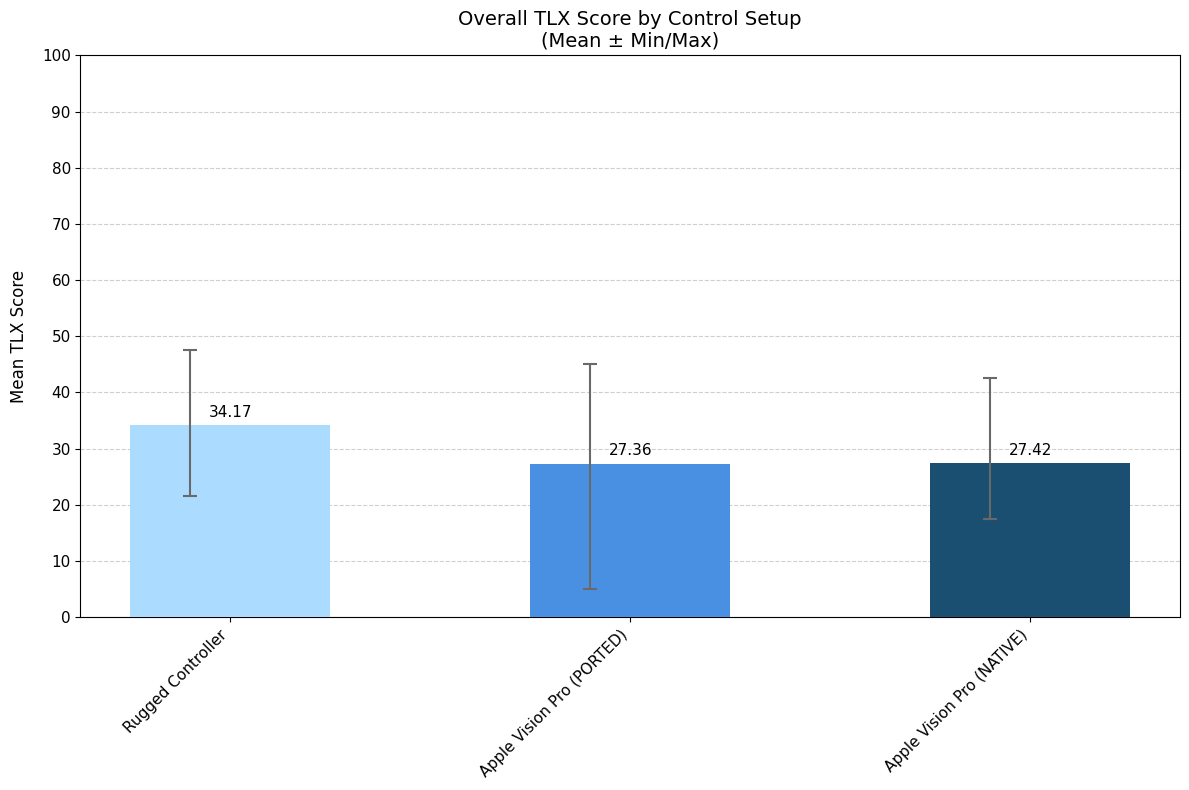

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ——— Load TLX data, treating commas as decimal points ———
df = pd.read_csv(
    'tlx.csv',            # your TLX CSV
    sep=';',
    encoding='latin1',
    decimal=','           # "12,5" → 12.5
)

# ——— Make sure your TLX SCORE column is numeric ———
df['TLX SCORE'] = pd.to_numeric(df['TLX SCORE'], errors='coerce')

# ——— Compute mean, min, max per setup ———
group       = df.groupby('Control Setup')['TLX SCORE']
setups      = ['Rugged Controller',
               'Apple Vision Pro (PORTED)',
               'Apple Vision Pro (NATIVE)']

mean_scores = group.mean().loc[setups]
min_scores  = group.min().loc[setups]
max_scores  = group.max().loc[setups]

low_err     = mean_scores - min_scores
high_err    = max_scores - mean_scores

# ——— Colors (same as before) ———
colors = {
    'Rugged Controller':        '#ABDBFF',
    'Apple Vision Pro (PORTED)': '#4A90E2',
    'Apple Vision Pro (NATIVE)': '#1B4F72'
}

# ——— Plot ———
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_axisbelow(True)

x          = np.arange(len(setups))
bar_colors = [colors[s] for s in setups]

bars = ax.bar(
    x,
    mean_scores.values,
    color=bar_colors,
    zorder=3,
    width=0.5
)

# add value labels atop each bar
ax.bar_label(
    bars,
    labels=[f"{v:.2f}" for v in mean_scores.values],
    padding=4,
    fontsize=11
)

# draw error-bars (nudge x by 0 if you like fine-tuning)
ax.errorbar(
    x-0.1,
    mean_scores.values,
    yerr=[low_err.values, high_err.values],
    fmt='none',
    ecolor='dimgray',
    capsize=5,
    elinewidth=1.5,
    capthick=1.5,
    zorder=3
)

# ——— Labels & styling ———
ax.set_xticks(x)
ax.set_xticklabels(setups, rotation=45, ha='right', fontsize=11)
ax.set_ylabel('Mean TLX Score', fontsize=12, labelpad=10)
ax.set_title('Overall TLX Score by Control Setup\n(Mean ± Min/Max)', fontsize=14)

# TLX scores range from 1 to 20
ax.set_ylim(1, 20)
ax.set_yticks(np.arange(0, 101, 10))
ax.tick_params(axis='y', labelsize=11)

# ——— Grid behind bars ———
ax.grid(axis='y', linestyle='--', alpha=0.6, zorder=1)

plt.tight_layout()
plt.show()
